In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [2]:
share_num = 200000
max_car = -0.01 * share_num

In [3]:
# Use monte carlo to simulate the expected utility of always buy without hiring the expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

# Convert log returns to actual price ratios and calculate profit
price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
profit = price_ratios - 1  # (final_price/initial_price - 1)
profit = profit * share_num  # Scale up to the number of shares

# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
percentile_5 = np.percentile(profit, 5)
tail_values = profit[profit <= percentile_5]
cvar = np.mean(tail_values)  # This is CVaR

(array([2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 8.000e+00,
        5.000e+00, 8.000e+00, 1.200e+01, 1.300e+01, 2.000e+01, 2.300e+01,
        3.000e+01, 4.300e+01, 7.600e+01, 8.300e+01, 1.060e+02, 1.400e+02,
        1.580e+02, 1.740e+02, 2.850e+02, 3.230e+02, 4.150e+02, 4.790e+02,
        5.380e+02, 7.120e+02, 8.140e+02, 8.580e+02, 1.061e+03, 1.229e+03,
        1.442e+03, 1.557e+03, 1.795e+03, 1.900e+03, 2.085e+03, 2.258e+03,
        2.488e+03, 2.626e+03, 2.868e+03, 3.026e+03, 3.176e+03, 3.349e+03,
        3.429e+03, 3.510e+03, 3.427e+03, 3.470e+03, 3.426e+03, 3.521e+03,
        3.414e+03, 3.282e+03, 3.145e+03, 3.165e+03, 2.894e+03, 2.790e+03,
        2.705e+03, 2.475e+03, 2.191e+03, 2.149e+03, 1.917e+03, 1.694e+03,
        1.565e+03, 1.413e+03, 1.229e+03, 1.083e+03, 9.840e+02, 8.240e+02,
        6.660e+02, 6.110e+02, 5.360e+02, 4.210e+02, 4.070e+02, 2.810e+02,
        2.300e+02, 2.170e+02, 1.390e+02, 1.100e+02, 1.050e+02, 6.900e+01,
        6.400e+01, 5.700e+01, 4.500e+0

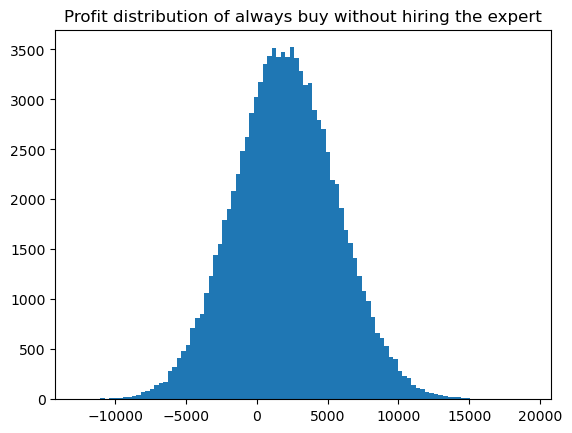

In [4]:
# plot the profit distribution
plt.title('Profit distribution of always buy without hiring the expert')
plt.hist(profit, bins=100)

In [5]:
# calculate the expected utility without risk
profit.mean()

2037.1408889305849

In [6]:
# calculate the expected utility with risk
print('cvar is', cvar)
print('Maximum allowable cvar is', max_car)
if cvar < max_car:
    print('Risk is too high, the expected utility is 0')
else:
    expected_utility = profit.mean() 
    print(expected_utility)

cvar is -5294.148054667894
Maximum allowable cvar is -2000.0
Risk is too high, the expected utility is 0


In [7]:
# Conclusion: always buy is too risky, the expected utility is 0

In [8]:
# Use monte carlo to simulate the expected utility of buy with expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
potential_profit = potential_profit * share_num  # Scale up to the number of shares

profit = np.where(price_estimate > 0.0028, potential_profit, 0)

# the actual investment profit is the array of actually realized investment profits
# so everytime price estimate is too much and we decidee not to go with the investment
# the return should be ignored
# so only accounting for the times when we actually invest
# Create mask of where we actually invest based on price estimate
investment_mask = price_estimate > 0.0028

# Only include profits where we actually invested
actual_investment_profit = potential_profit[investment_mask]

actual_profit = profit - 1000  # Cost of hiring the expert


# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes from the actual profit
percentile_5 = np.percentile(actual_profit, 5)
tail_values = actual_profit[actual_profit <= percentile_5]
cvar = np.mean(tail_values)  



(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        5.0000e+00, 1.4000e+01, 8.0000e+00, 3.1000e+01, 4.5000e+01,
        6.4000e+01, 5.2143e+04, 1.2500e+02, 1.7000e+02, 2.6600e+02,
        3.1700e+02, 4.2300e+02, 5.5000e+02, 6.5200e+02, 7.8000e+02,
        8.7700e+02, 1.0050e+03, 1.1560e+03, 1.4190e+03, 1.4140e+03,
        1.4910e+03, 1.5890e+03, 1.7450e+03, 1.6890e+03, 1.7280e+03,
        1.6510e+03, 1.7560e+03, 1.6770e+03, 1.7060e+03, 1.6270e+03,
        1.5900e+03, 1.4930e+03, 1.4100e+03, 1.3930e+03, 1.3210e+03,
        1.2070e+03, 1.1390e+03, 1.0670e+03, 1.0910e+03, 9.6300e+02,
        8.8900e+02, 8.0000e+02, 7.6400e+02, 6.4400e+02, 6.1900e+02,
        5.5800e+02, 5.3400e+02, 4.8900e+02, 4.2300e+02, 4.2700e+02,
        3.4600e+02, 3.1000e+02, 3.0100e+02, 2.5900e+02, 2.5300e+02,
        1.9300e+02, 2.0000e+02, 1.5900e+02, 1.2900e+02, 1.3000e+02,
        1.0400e+02, 1.0000e+02, 7.8000e+01, 7.0000e+01, 5.4000e+01,
        6.0000e+01, 4.6000e+01, 4.1000e+01, 3.70

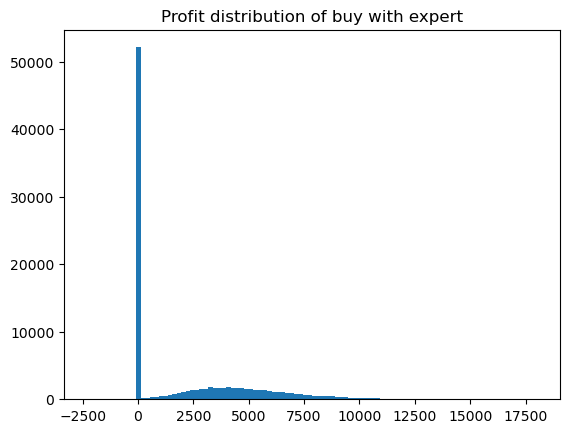

In [9]:
# plot the profit distribution
plt.title('Profit distribution of buy with expert')
plt.hist(profit, bins=100)

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 5.000e+00, 2.000e+01, 1.200e+01, 1.700e+01, 2.800e+01,
        4.700e+01, 4.000e+01, 5.900e+01, 7.900e+01, 1.140e+02, 1.540e+02,
        1.970e+02, 2.340e+02, 2.920e+02, 3.500e+02, 4.360e+02, 4.850e+02,
        6.190e+02, 7.290e+02, 8.840e+02, 9.300e+02, 1.160e+03, 1.337e+03,
        1.581e+03, 1.687e+03, 1.952e+03, 2.066e+03, 2.342e+03, 2.452e+03,
        2.668e+03, 2.898e+03, 3.089e+03, 3.148e+03, 3.379e+03, 3.526e+03,
        3.622e+03, 3.600e+03, 3.561e+03, 3.543e+03, 3.747e+03, 3.503e+03,
        3.449e+03, 3.326e+03, 3.096e+03, 3.061e+03, 2.841e+03, 2.680e+03,
        2.492e+03, 2.246e+03, 2.091e+03, 1.869e+03, 1.708e+03, 1.601e+03,
        1.329e+03, 1.164e+03, 1.025e+03, 8.780e+02, 7.790e+02, 6.750e+02,
        5.450e+02, 4.800e+02, 4.170e+02, 3.170e+02, 2.860e+02, 2.300e+02,
        1.570e+02, 1.420e+02, 1.130e+0

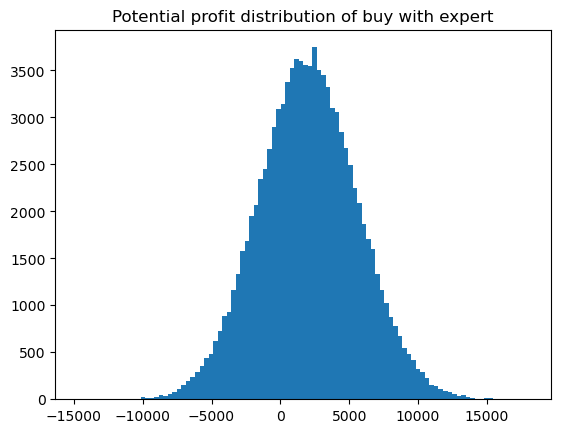

In [10]:
# plot the potential profit distribution
plt.title('Potential profit distribution of buy with expert')
plt.hist(potential_profit, bins=100)

(array([9.9975e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

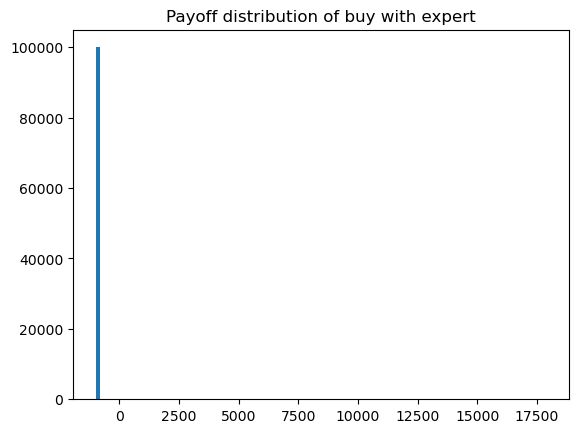

In [37]:
# plot the actual profit distribution
plt.title('Payoff distribution of buy with expert')
plt.hist(actual_profit, bins=100)

In [12]:
# calculate the expected utility without risk
actual_profit.mean()

1323.904649412482

In [13]:
# calculate the expected utility with risk
print('cvar is', cvar)
print('Maximum allowable cvar is', max_car)
if cvar < max_car:
    print('Risk is too high, the expected utility is 0')
else:
    expected_utility = actual_profit.mean() 
    print(expected_utility)


cvar is -1001.5544978073293
Maximum allowable cvar is -2000.0
1323.904649412482


In [14]:
# Use monte carlo to simulate the expected utility of buy with expert

buy_threshold = -0.05
result = []
counter = 0
while True:
    price_0 = np.random.normal(0.0025, 0.00327, 100000)
    price_1 = np.random.normal(price_0, 0.00327, 100000)
    price_2 = np.random.normal(price_1, 0.00327, 100000)
    price_3 = np.random.normal(price_2, 0.00327, 100000)
    price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)
    price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
    potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
    potential_profit = potential_profit * share_num  # Scale up to the number of shares
    profit = np.where(price_estimate > buy_threshold, potential_profit, 0)
    # the actual investment profit is the array of actually realized investment profits
    # so everytime price estimate is too much and we decidee not to go with the investment
    # the return should be ignored
    # so only accounting for the times when we actually invest
    # Create mask of where we actually invest based on price estimate
    investment_mask = price_estimate > buy_threshold
    # Only include profits where we actually invested
    # Only include profits where we actually invested
    actual_investment_profit = potential_profit[investment_mask]
    
    actual_profit = profit - 1000  # Cost of hiring the expert

    # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes from the actual profit
    percentile_5 = np.percentile(actual_profit, 5)
    tail_values = actual_profit[actual_profit <= percentile_5]
    cvar = np.mean(tail_values)  # This is CVaR
    

    if cvar < max_car:
        expected_utility = 0
    else:
        expected_utility = actual_profit.mean()

    print('buy_threshold is', buy_threshold)
    print('cvar is', cvar)
    print('Maximum allowable cvar is', max_car)
    print('expected utility is', expected_utility)

    buy_threshold += 0.0001

    if buy_threshold > 0.023:
        break


buy_threshold is -0.05
cvar is -6285.024379947622
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.0499
cvar is -6319.948410695204
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.0498
cvar is -6340.211631839957
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.049699999999999994
cvar is -6325.474751137548
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04959999999999999
cvar is -6308.65135127908
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04949999999999999
cvar is -6322.025864664302
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.049399999999999986
cvar is -6314.235492551639
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04929999999999998
cvar is -6287.915942783427
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04919999999999998
cvar is -6289.7966371645525
Maximu

In [46]:
# Use monte carlo to simulate the expected utility of buy with expert
buy_threshold = -0.02
result = []
counter = 0
while True:
    for i in range(10):
        price_0 = np.random.normal(0.0025, 0.00327, 100000)
        price_1 = np.random.normal(price_0, 0.00327, 100000)
        price_2 = np.random.normal(price_1, 0.00327, 100000)
        price_3 = np.random.normal(price_2, 0.00327, 100000)

        price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

        price_ratios = np.exp(price_0) * np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
        potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
        potential_profit = potential_profit * share_num  # Scale up to the number of shares

        profit = np.where(price_estimate > buy_threshold, potential_profit, 0)

        # the actual investment profit is the array of actually realized investment profits
        # so everytime price estimate is too much and we decidee not to go with the investment
        # the return should be ignored
        # so only accounting for the times when we actually invest
        # Create mask of where we actually invest based on price estimate
        investment_mask = price_estimate > buy_threshold

        # Only include profits where we actually invested
        actual_investment_profit = potential_profit[investment_mask]

        actual_profit = profit - 1000  # Cost of hiring the expert

        # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes of the actual profit
        percentile_5 = np.percentile(actual_profit, 5)
        tail_values = actual_profit[actual_profit <= percentile_5]
        cvar = np.mean(tail_values)

        # Calcualte CVaR (cvar) as the mean of the worst 5% of outcomes from the actual_investment_profit
        percentile_5 = np.percentile(actual_investment_profit, 5)
        tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
        cvar_actual = np.mean(tail_values)

        

        # calculate the expected utility with risk
        if cvar < max_car:
            expected_utility = -1000
        else:
            expected_utility = actual_profit.mean()

        result.append([buy_threshold, expected_utility, cvar, actual_investment_profit.mean(), cvar_actual])

    counter += 1
    buy_threshold += 0.0001

    if buy_threshold > 0.023:
        break


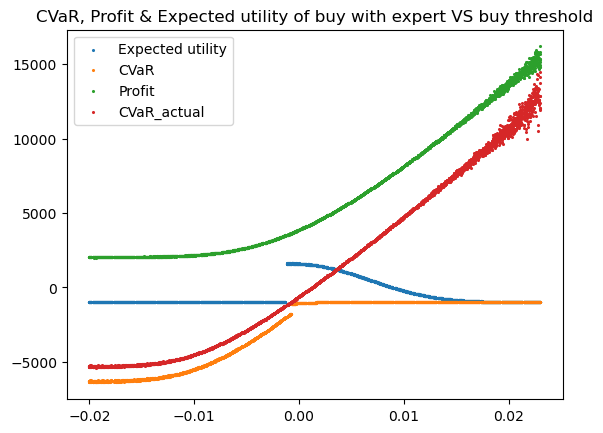

In [47]:
result = np.array(result)

plt.title('CVaR, Profit & Expected utility of buy with expert VS buy threshold')

# plot it as a scatter plot, make the dots smaller
plt.scatter(result[:, 0], result[:, 1], s=1.5)

# plot the cvar as a scatter plot
plt.scatter(result[:, 0], result[:, 2], s=1.5)

# plot the potential profit as a scatter plot
plt.scatter(result[:, 0], result[:, 3], s=1.5)

# plot the cvar_actual as a scatter plot
plt.scatter(result[:, 0], result[:, 4], s=1.5)

# take the average of y values for each x value
unique_xs = np.unique(result[:, 0])


# add legend
plt.legend(['Expected utility', 'CVaR', 'Profit', 'CVaR_actual'])





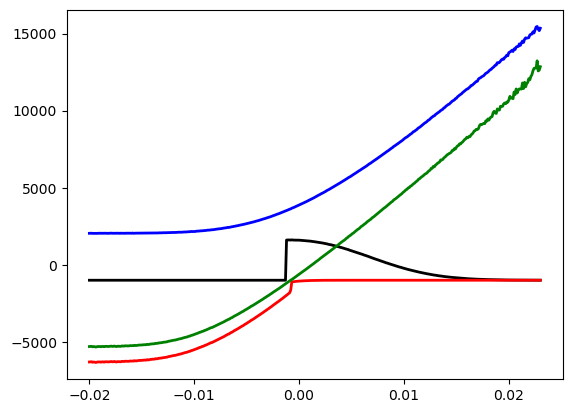

In [52]:
import pandas as pd

# convert the result to a pandas dataframe
result = np.array(result)



df = pd.DataFrame(result, columns=['x', 'y', 'cvar', 'profit', 'cvar_actual'])

# take the average of y values for each x value
averages = df.groupby('x').mean()

# plot the averages
plt.plot(averages.index, averages['y'], color='black', linewidth=2)
plt.plot(averages.index, averages['cvar'], color='red', linewidth=2)
plt.plot(averages.index, averages['profit'], color='blue', linewidth=2)
plt.plot(averages.index, averages['cvar_actual'], color='green', linewidth=2)


In [50]:
# find the x value that maximizes y
max_y = averages['y'].max()
max_x = averages[averages['y'] == max_y].index[0]

print('Maximum expected utility is', max_y, 'when buy threshold is', max_x)


Maximum expected utility is 1618.1968915748198 when buy threshold is -0.0007000000000000662


In [56]:
# find the CVaR when expected utility is maximized
cvar_at_max_y = averages[averages['y'] == max_y]['cvar'].values[0]
print('CVaR at maximum expected utility is', cvar_at_max_y)

CVaR at maximum expected utility is -1106.6453682929387


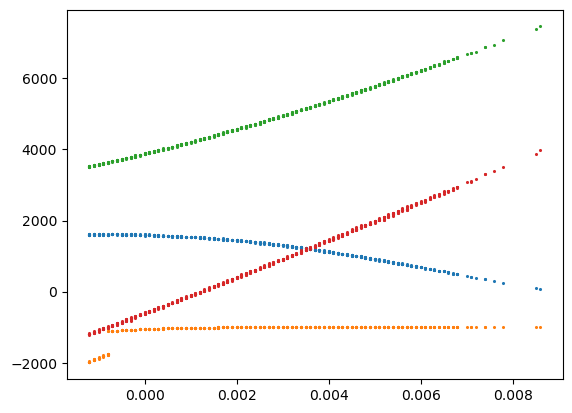

In [61]:
# plot when cvar is >-2000 and < -1000

df_filtered = df[(df['cvar'] > -2000) & (df['cvar'] < -1000)]

plt.scatter(df_filtered['x'], df_filtered['y'], s=1.5)
plt.scatter(df_filtered['x'], df_filtered['cvar'], s=1.5)
plt.scatter(df_filtered['x'], df_filtered['profit'], s=1.5)
plt.scatter(df_filtered['x'], df_filtered['cvar_actual'], s=1.5)
